In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [21]:
trainset='/content/drive/MyDrive/Anh faceID group/train'
validationset='/content/drive/MyDrive/Anh faceID group/validation'
train=ImageDataGenerator(rescale=1/255.0,validation_split=0)
validation=ImageDataGenerator(rescale=1/255.0,validation_split=0.9)

In [22]:
train_data=train.flow_from_directory(trainset,target_size=(150,150),batch_size=10,class_mode='categorical',subset="training",shuffle=True,)
validation_set=validation.flow_from_directory(validationset,target_size=(150,150),batch_size=10,class_mode='categorical',shuffle=True,subset="validation",)

Found 138 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [23]:
print(train_data.class_indices)
print(validation_set.class_indices)

{'binh': 0, 'tien': 1, 'trieu': 2}
{'binh': 0, 'tien': 1, 'trieu': 2}


In [26]:
from keras.backend import conv2d
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

In [27]:
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(3,activation='softmax'))

In [28]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
history=model.fit(train_data,batch_size=10,epochs=10,verbose=1,validation_data=validation_set)

Epoch 1/10
14/14 [==============================] - 35s 2s/step - loss: 6.2755 - accuracy: 0.6957 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 2/10
14/14 [==============================] - 32s 2s/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 7.7948e-04 - val_accuracy: 1.0000
Epoch 3/10
14/14 [==============================] - 33s 2s/step - loss: 1.2161e-04 - accuracy: 1.0000 - val_loss: 3.9280e-05 - val_accuracy: 1.0000
Epoch 4/10
14/14 [==============================] - 32s 2s/step - loss: 2.7321e-05 - accuracy: 1.0000 - val_loss: 1.4277e-05 - val_accuracy: 1.0000
Epoch 5/10
14/14 [==============================] - 32s 2s/step - loss: 1.3488e-05 - accuracy: 1.0000 - val_loss: 9.5721e-06 - val_accuracy: 1.0000
Epoch 6/10
14/14 [==============================] - 32s 2s/step - loss: 4.7441e-06 - accuracy: 1.0000 - val_loss: 3.7948e-06 - val_accuracy: 1.0000
Epoch 7/10
14/14 [==============================] - 33s 2s/step - loss: 1.9963e-06 - accuracy: 1.0000 - val_loss: 1.8795e-06

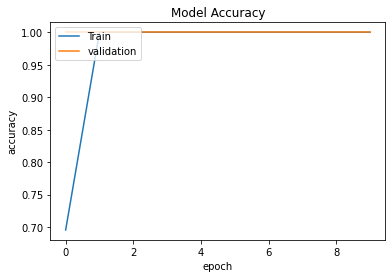

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

In [31]:
model.save('/content/drive/MyDrive/BT AI/FaceIDGr.h5')

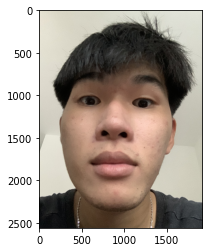

In [46]:
url='/content/drive/MyDrive/Anh test/z3406326496487_e8d490855dd13b379a5431743d73007c.jpg'
plt.imshow(load_img(url))

In [47]:
img=load_img('/content/drive/MyDrive/Anh test/z3406326496487_e8d490855dd13b379a5431743d73007c.jpg',target_size=(150,150))
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

array([2])